# Anaylsis of Packets of Raw Data Pre Capacitor

Now we will try to use all the data to plot 1 second worth of time (first 10 rows). To do this we need to give the extra entries in the array time stamps. We will do this using the sampling frequency of 1000Hz to generate time stamps which are 0.001 larger than the previous one.

In [1]:
import numpy as np
import altair as alt
import os
import pandas as pd

from src.data_processing import create_data_from_entry, time_period, time_period
from src.vizualization import generate_stability_rules, LINE_COLOUR

# Render altair charts correctly
alt.renderers.enable('notebook')

# Store the altair char json separately and not in the notebook to reduce
# notebook size
alt.data_transformers.enable('json')

%load_ext autoreload
%autoreload 2

## Import and Clean Raw Data

First we import the clean and calibrated data created in [Notebook 1](1-rdp-voltage-signal-exploration-pre-capacitor.ipynb). We will only be looking at a couple of rows of data at most so we don't need to import a lot of data.

In [2]:
data = pd.read_csv(os.path.join(os.getcwd(), "..", "data", "processed", "pre-capactitor-raw-data.csv"), nrows=10)
data.head()

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,Datetime
0,90.371049,89.006572,88.368966,87.999155,84.658099,87.297788,86.985361,87.680352,87.457190,89.784452,...,91.671765,92.385884,93.144635,94.674890,93.291285,93.986275,93.661096,93.348669,91.608005,2018-09-21 16:56:48.930999994
1,93.246652,91.888552,90.619716,90.434810,88.745154,87.520950,88.413599,86.175602,86.704815,86.985361,...,88.872675,89.580418,90.479442,91.454979,92.424141,92.022449,93.514447,93.578207,92.819456,2018-09-21 16:56:49.041000128
2,91.486860,90.913014,88.292454,88.930060,88.209565,85.537996,87.285036,86.456148,86.596422,88.171309,...,89.746195,91.620757,92.035201,92.985234,94.387967,93.928891,93.559079,94.215813,91.952312,2018-09-21 16:56:49.367999792
3,89.344504,91.142552,90.804621,92.749320,92.105338,94.222189,93.348669,94.107420,93.565455,92.609046,...,89.905597,89.593170,87.967275,88.062916,85.735654,87.195771,86.035328,86.851464,88.209565,2018-09-21 16:56:49.640000105
4,87.731360,89.452897,91.066040,92.334876,92.570790,95.204103,93.329541,93.960771,93.463438,93.093627,...,90.696228,88.713274,88.171309,88.031035,85.722901,86.857840,86.985361,86.679310,87.565583,2018-09-21 16:56:49.912999868


In [3]:
data.shape

(10, 101)

## Anaylsis of a packet of data

In [4]:
first_packet = create_data_from_entry(0, data)
first_packet.head(15)

,Datetime,Value
0,2018-09-21 16:56:48.930999994,90.371049
1,2018-09-21 16:56:48.932099995,89.006572
2,2018-09-21 16:56:48.933199996,88.368966
3,2018-09-21 16:56:48.934299997,87.999155
4,2018-09-21 16:56:48.935399998,84.658099
5,2018-09-21 16:56:48.936499999,87.297788
6,2018-09-21 16:56:48.937600000,86.985361
7,2018-09-21 16:56:48.938700001,87.680352
8,2018-09-21 16:56:48.939800002,87.457190
9,2018-09-21 16:56:48.940900003,89.784452


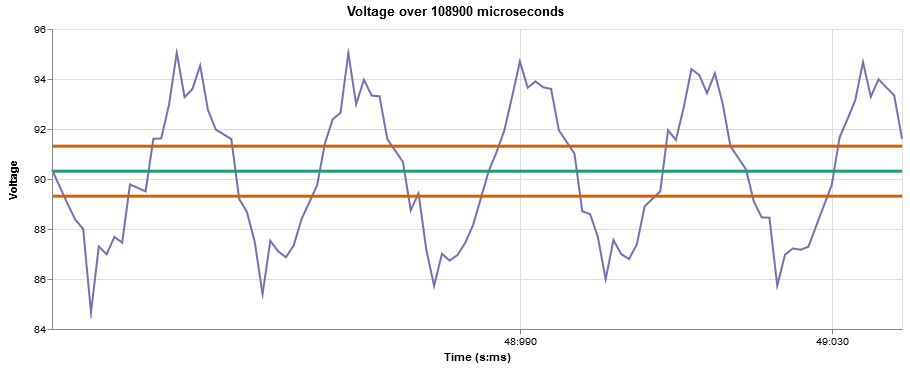

In [5]:
first_packet_limits_layer = generate_stability_rules(first_packet)

base = alt.Chart().mark_line(color=LINE_COLOUR).encode(
    x = alt.X("Datetime:T", 
              timeUnit="secondsmilliseconds", 
              title = "Time (s:ms)",
              axis = alt.Axis(tickCount=10)
             ),
    y = alt.Y("Value:Q", scale = alt.Scale(domain=[84, 96]), title="Voltage")
)

alt.layer(base, first_packet_limits_layer, data=first_packet, 
          title="Voltage over {} microseconds".format(time_period(first_packet, time_unit="microseconds")), 
          config={"background": "white"},
          width = 850
         )

As you can see, there is a 50Hz wave underneath the data. Let's look at the second packet of data to see any more.

In [6]:
second_packet = create_data_from_entry(1, data)
second_packet.head()

,Datetime,Value
0,2018-09-21 16:56:49.041000128,93.246652
1,2018-09-21 16:56:49.044270124,91.888552
2,2018-09-21 16:56:49.047540120,90.619716
3,2018-09-21 16:56:49.050810116,90.434810
4,2018-09-21 16:56:49.054080112,88.745154


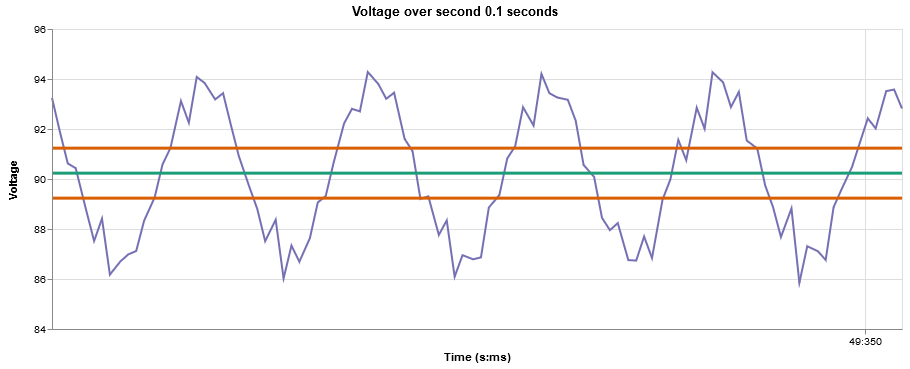

In [7]:
second_packet_limits_layer = generate_stability_rules(second_packet)

alt.layer(base, second_packet_limits_layer, data=second_packet, 
          title="Voltage over second 0.1 seconds", 
          config={"background": "white"},
          width = 850
         )

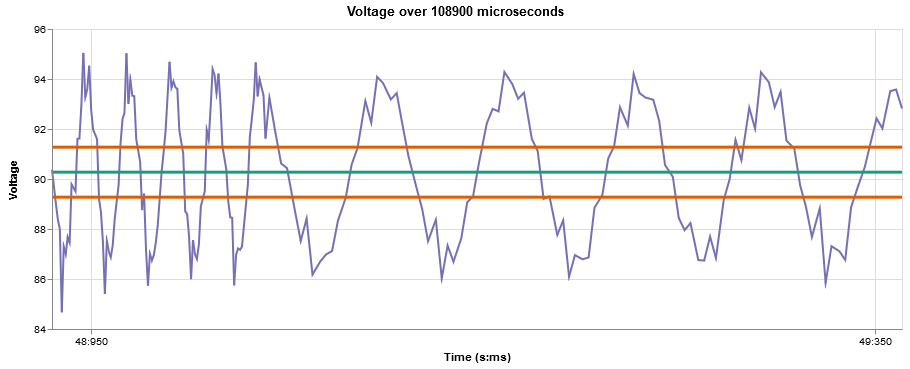

In [9]:
packets = pd.concat([first_packet, second_packet])

packets_limits_layer = generate_stability_rules(packets)

alt.layer(base, packets_limits_layer, data=packets, 
          title="Voltage over {} microseconds".format(time_period(first_packet, time_unit="microseconds")), 
          config={"background": "white"},
          width = 850
         )

## Conclusion

There is clearly a 50Hz wave as part of the signal just from looking at 108900 microseconds worth of data. The next notebook will look at the effect of averaging out this 50Hz wave by averaging points which are 180 degrees apart.